# Employee Analysis

# Introduction

In the contemporary corporate environment, data-driven decision-making plays a pivotal role in understanding and optimizing the workforce. This project is dedicated to the exploration and analysis of an extensive employee dataset, encompassing essential aspects of the employee landscape. The dataset includes information on education, tenure, location, compensation, demographics, work experiences, and employee retention. It serves as a valuable source of insights

![](https://images.unsplash.com/photo-1522071820081-009f0129c71c?auto=format&fit=crop&q=80&w=2070&ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D)

# Data Description

* **Education:** The educational qualifications of employees, including degree, institution, and field of study.
* **Joining Year:** The year each employee joined the company, indicating their length of service.
* **City:** The location or city where each employee is based or works.
* **Payment Tier:** Categorization of employees into different salary tiers.
* **Age:** The age of each employee, providing demographic insights.
* **Gender:** Gender identity of employees, promoting diversity analysis.
* **Ever Benched:** Indicates if an employee has ever been temporarily without assigned work.
* **Experience in Current Domain:** The number of years of experience employees have in their current field.
* **Leave or Not:** a target column

In [25]:
#Importing the necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')


In [26]:
df = pd.read_csv("/kaggle/input/employee-dataset/Employee.csv")
#Reading the data and storing it in "df" 

In [27]:
df.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1


In [28]:
df.shape

(4653, 9)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Education                  4653 non-null   object
 1   JoiningYear                4653 non-null   int64 
 2   City                       4653 non-null   object
 3   PaymentTier                4653 non-null   int64 
 4   Age                        4653 non-null   int64 
 5   Gender                     4653 non-null   object
 6   EverBenched                4653 non-null   object
 7   ExperienceInCurrentDomain  4653 non-null   int64 
 8   LeaveOrNot                 4653 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 327.3+ KB


In [30]:
df.duplicated().sum() #Checking duplicates

1889

In [31]:
df[df.duplicated()]

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
111,Bachelors,2017,Pune,2,27,Female,No,5,1
130,Bachelors,2017,Bangalore,3,26,Female,No,4,0
138,Bachelors,2017,New Delhi,3,28,Male,No,2,0
160,Bachelors,2014,Bangalore,3,28,Female,No,3,0
167,Bachelors,2014,Bangalore,3,25,Male,No,3,0
...,...,...,...,...,...,...,...,...,...
4640,Bachelors,2015,Bangalore,3,35,Male,No,0,0
4642,Bachelors,2012,Bangalore,3,36,Female,No,4,0
4646,Bachelors,2013,Bangalore,3,25,Female,No,3,0
4648,Bachelors,2013,Bangalore,3,26,Female,No,4,0


In [32]:
df.drop_duplicates(inplace = True) #Dropping Duplicates
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2764 entries, 0 to 4651
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Education                  2764 non-null   object
 1   JoiningYear                2764 non-null   int64 
 2   City                       2764 non-null   object
 3   PaymentTier                2764 non-null   int64 
 4   Age                        2764 non-null   int64 
 5   Gender                     2764 non-null   object
 6   EverBenched                2764 non-null   object
 7   ExperienceInCurrentDomain  2764 non-null   int64 
 8   LeaveOrNot                 2764 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 215.9+ KB


# Data Visualization

# Education of Employees

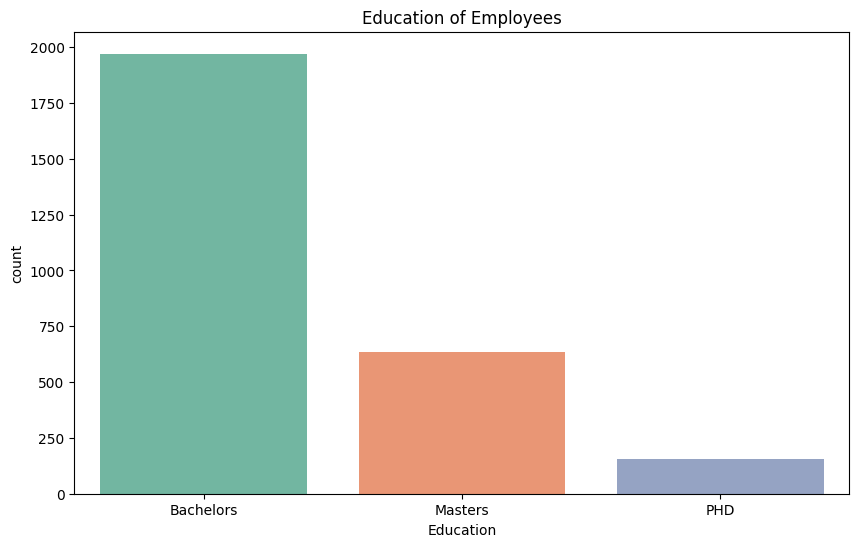

In [33]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Education', palette='Set2')
plt.title('Education of Employees')
plt.show()

**Observations**

* 1971 employees with a Bachelor's degree stating that majority of the employees have Bachelor's degree.
* 637 employees with a Master's degree
* 156 employees with a PhD

# Distribution of Joining Years

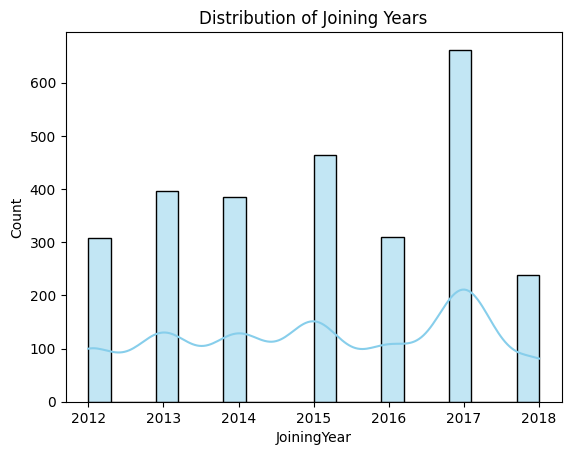

In [34]:
sns.histplot(data=df, x='JoiningYear', bins=20, kde=True, color='skyblue')
plt.title('Distribution of Joining Years')
plt.show()

**Observations**

* The year 2017 saw the highest number of employees joining the company, with 662 new hires.
* Following closely, in 2015, there were 464 new employees joining the company.
* In 2013, a total of 396 employees joined the company.
* The lowest number of new hires was in 2018, with only 239 employees joining the company.

# Employees Distribution by City

In [35]:
city_cnts = df['City'].value_counts()
px.pie(city_cnts, names=city_cnts.index, values=city_cnts.values, title='Employees Distribution by City', color_discrete_sequence=px.colors.sequential.Sunset, hole = 0.5)

**Observations**

The majority of employees, 42.4%, are from Bangalore, followed by 29% from Pune and 28.7% from New Delhi

# Employee Ages Distribution

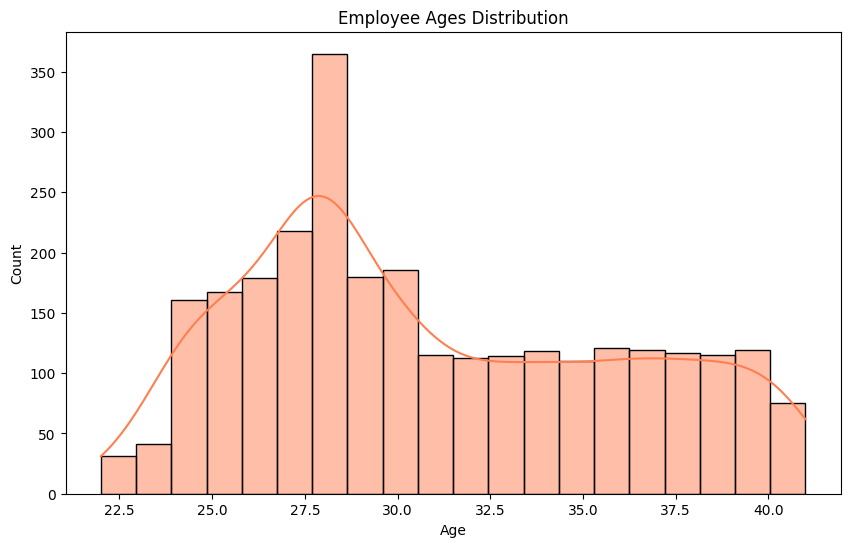

In [36]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Age', bins=20, kde=True, color='coral')
plt.title('Employee Ages Distribution')
plt.show()

**Observations**

* The minimum age of employees in the dataset is 22 years.
* 25% of employees fall below or equal to the age of 27 years.
* 50% of employees fall below or equal to the age of 30 years.
* 75% of employees fall below or equal to the age of 35 years.
* The maximum age recorded for employees in the dataset is 41 years.

# Gender Distribution

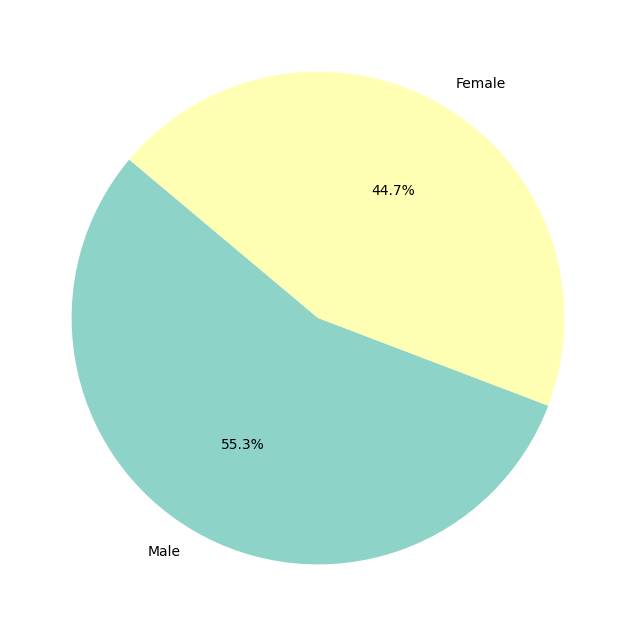

In [37]:
gender_counts = df['Gender'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('Set3'))
plt.show()

**Observations**

* There are more Male employees in the organization than Female employees.

# Count of Employees Benched or Not

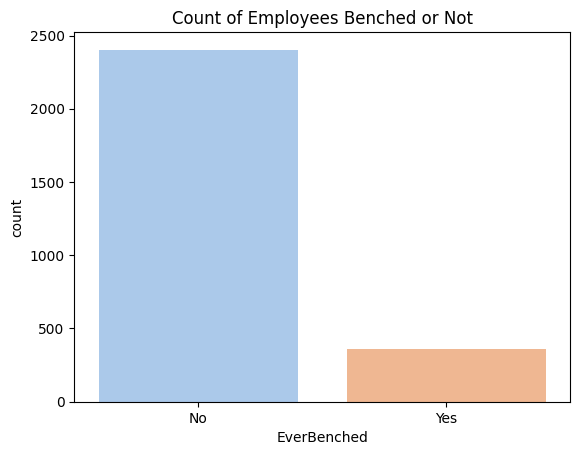

In [38]:
sns.countplot(data=df, x='EverBenched', palette='pastel')
plt.title('Count of Employees Benched or Not')
plt.show()

**Observations**

* 87% of the Employees are deployed in the project which is good but it can be increased.
* 13% of the Employees are in Bench this need to be reduced in order to increase the resource utilization.

# Distribution of Experience in Current Domain

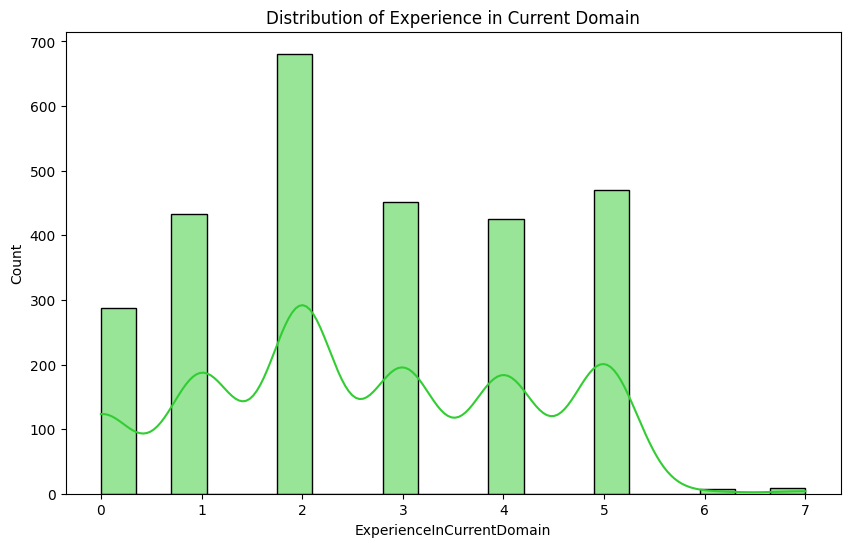

In [39]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='ExperienceInCurrentDomain', bins=20, kde=True, color='limegreen')
plt.title('Distribution of Experience in Current Domain')
plt.show()

**Observations**

* The majority of employees have 2 years of experience (681 employees), followed by 5 years of experience (470 employees).
* There is a gradual decrease in the number of employees as the years of experience increase.
* Only a small number of employees have 6 years (8 employees) or 7 years (9 employees) of experience in the current domain.

# Count of Employees Leave or Not

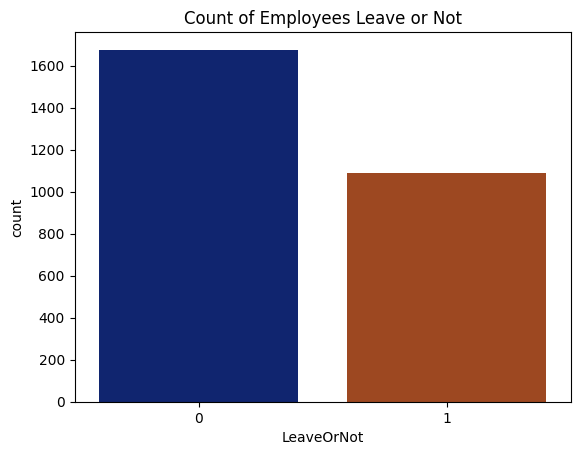

In [40]:
sns.countplot(data=df, x='LeaveOrNot', palette='dark')
plt.title('Count of Employees Leave or Not')
plt.show()

**Observation**

* Majority of Employees are not in leave

# Payment Tier Distribution

In [41]:
paymentTier_cnts = df['PaymentTier'].value_counts()
px.pie(city_cnts, names=paymentTier_cnts.index, values=paymentTier_cnts.values, title='Payment Tier Distribution', color_discrete_sequence=px.colors.sequential.Jet, hole = 0.5)

**Observations**

* The majority of employees, 71.5%, are in the 3rd Payment tier.
* 20.6% of employees are in the 2nd Payment tier, and only 7.89% of employees are in the 1st Payment tier.

# Age Distribution by Gender

In [42]:
px.box(df, x='Gender', y='Age', color='Gender', title='Age Distribution by Gender' , color_discrete_sequence=px.colors.sequential.deep_r)

**Observations**

The majority of the male and female employees are aged between 27 and 35.

# Experience in Current Domain by Payment Tier

In [43]:
px.violin(df, x='PaymentTier', y='ExperienceInCurrentDomain', 
                title='Experience in Current Domain by Payment Tier', color = 'PaymentTier', color_discrete_sequence=px.colors.sequential.RdBu_r )

**Observations**

* Most employees in the 1st payment tier fall between 1 year and 4 years of experience.
* Most employees in the 2nd payment tier fall between 2 years and 4 years of experience.
* Most employees in the 3rd payment tier fall between 1 year and 4 years of experience.

# Gender Distribution by City

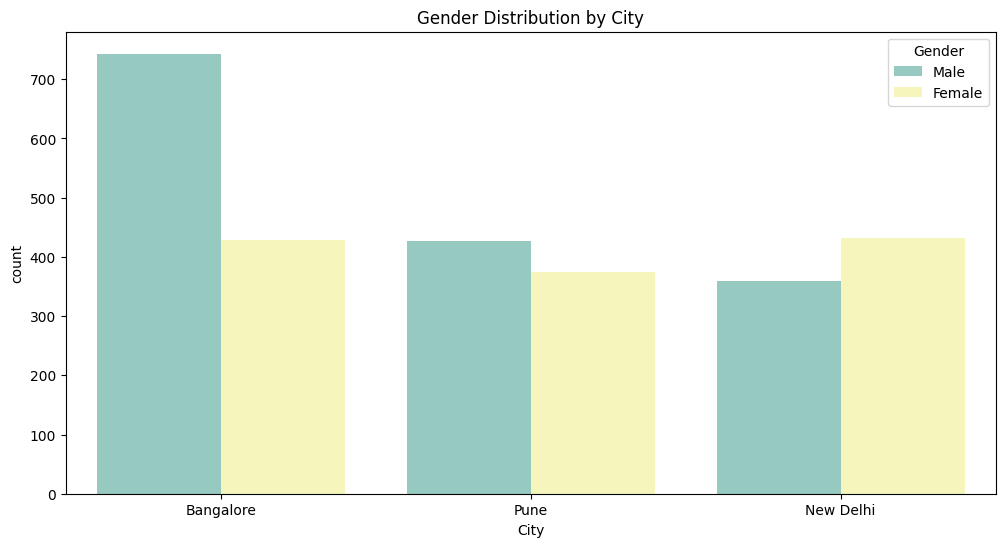

In [44]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='City', hue='Gender', palette='Set3')
plt.title('Gender Distribution by City')
plt.show()

**Observations**

* Bangalore and Pune have more male employees.
* New Delhi has more female employees.

# Payment Tier and Age by Gender

In [45]:
px.box(df, x='PaymentTier', y='Age', color='Gender', title='Box Plot: Payment Tier and Age by Gender' , color_discrete_sequence=px.colors.sequential.RdBu)

**Observations**

* In 1st payment tier Most Male employees fall between the age of 26 and 35 years, Most Female employees fall between the age of 26 and 32 years.
* In 2nd payment tier Most Male employees fall between the age of 26 and 34 years, Most Female employees fall between the age of 27 and 35 years.
* In 3rd payment tier Most Male employees fall between the age of 28 and 35 years, Most Female employees fall between the age of 27 and 35 years.

# Conclusions


* The majority of employees hold Bachelor's degrees.
* The years 2017 and 2015 saw the highest number of new hires.
* Bangalore has the highest employee concentration, followed by Pune and New Delhi.
* The employee age range is relatively narrow, with most falling between 27 and 35.
* There are more male employees than female employees.
* An 87% deployment rate is positive, while strategies should be in place to reduce the no-deployment.
* The majority of employees have 2 years of experience.
* Employee stability is evident with the majority not on leave
* The majority of employees are in the 3rd Payment tier.
* Bangalore and Pune have more male employees, while New Delhi has more female employees.
* The presence of employees with Master's and PhD degrees indicates educational diversity.
